In [1]:
import pandas as pd

In [18]:
df = pd.read_csv("loandata.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [3]:
df['ApplicantIncome'].mean()

5403.459283387622

In [8]:
df['ApplicantIncome'].quantile(0.96)

15364.320000000014

##### create a new column based on their income

In [12]:
new = []
for sal in df['ApplicantIncome']:
    if sal <= 5500:
        new.append("Low")
    elif ((sal > 5500) and (sal <= 15000)):
        new.append("Medium")
    elif sal > 15000:
        new.append("High")

In [13]:
df['New']=new

In [14]:
def new_sal(x):
    if x<= 5500:
        return "low"
    elif ((x > 5500) and (x <= 15000)):
        return "Medium"
    elif x>15000:
        return "High"

In [17]:
df['ApplicantIncome'].apply(new_sal)

0       low
1       low
2       low
3       low
4       low
       ... 
609    High
610    High
611    High
612    High
613    High
Name: ApplicantIncome, Length: 614, dtype: object

## cut()

In [19]:
df['ApplicantIncome'].max()

81000

In [20]:
df["New"]=pd.cut(df['ApplicantIncome'],bins=[0,5500,15000,81000],labels=["Low","Medium","High"])

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,New
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N,Low
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y,Low
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,Low
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y,Low
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,Low


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    object  
 2   Married            611 non-null    object  
 3   Dependents         599 non-null    object  
 4   Education          614 non-null    object  
 5   Self_Employed      582 non-null    object  
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    object  
 12  Loan_Status        614 non-null    object  
 13  New                614 non-null    category
dtypes: category(1), float64(4), int64(1), object(8)
memory usage: 63.2+ KB


### selcting Datatypes

In [24]:
df.iloc[:,[0,1,2,3,4,5,11,12]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        614 non-null    object
 1   Gender         601 non-null    object
 2   Married        611 non-null    object
 3   Dependents     599 non-null    object
 4   Education      614 non-null    object
 5   Self_Employed  582 non-null    object
 6   Property_Area  614 non-null    object
 7   Loan_Status    614 non-null    object
dtypes: object(8)
memory usage: 38.5+ KB


In [31]:
df.iloc[:,[7,8,9,10]]

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1800.0,135.0,360.0,1.0
1,2917.0,98.0,360.0,1.0
2,41667.0,350.0,180.0,NaN
3,3683.0,113.0,480.0,1.0
4,5296.0,168.0,360.0,1.0
...,...,...,...,...
609,4750.0,120.0,360.0,1.0
610,0.0,600.0,180.0,0.0
611,0.0,700.0,300.0,1.0
612,0.0,490.0,180.0,1.0


In [32]:
df.select_dtypes("object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,Rural,Y
...,...,...,...,...,...,...,...,...
609,LP001640,Male,Yes,0,Graduate,Yes,Semiurban,Y
610,LP001536,Male,Yes,3+,Graduate,No,Semiurban,Y
611,LP001585,NaN,Yes,3+,Graduate,No,Urban,Y
612,LP002101,Male,Yes,0,Graduate,NaN,Urban,Y


In [33]:
df.select_dtypes("float")

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1800.0,135.0,360.0,1.0
1,2917.0,98.0,360.0,1.0
2,41667.0,350.0,180.0,NaN
3,3683.0,113.0,480.0,1.0
4,5296.0,168.0,360.0,1.0
...,...,...,...,...
609,4750.0,120.0,360.0,1.0
610,0.0,600.0,180.0,0.0
611,0.0,700.0,300.0,1.0
612,0.0,490.0,180.0,1.0


In [34]:
df.select_dtypes("int")

,ApplicantIncome
0,150
1,210
2,416
3,645
4,674
...,...
609,39147
610,39999
611,51763
612,63337


### JOINS

In [36]:
df1 = pd.DataFrame()

In [38]:
df1['Names'] = ['Kishore',"Dileep","Sreehari","Upendhar"]
df1['Age'] = [24,22,21,25]
df1['Salary'] = [30000,25000,40000,50000]

In [41]:
df1

,Names,Age,Salary
0,Kishore,24,30000
1,Dileep,22,25000
2,Sreehari,21,40000
3,Upendhar,25,50000


In [46]:
df2 = pd.DataFrame()

In [48]:
df2['Names'] = ["Anwesha","Bhavani","Sreehari","Dileep","Druvi"]
df2['Age'] = [23,21,21,22,18]
df2['Salary'] = [40000,35000,30000,25000,30000]

In [49]:
df2

,Names,Age,Salary
0,Anwesha,23,40000
1,Bhavani,21,35000
2,Sreehari,21,30000
3,Dileep,22,25000
4,Druvi,18,30000


### methods to join multiple dataframes
- concat()
- merge()

In [60]:
# join two datagrames row wise
concat_df = pd.concat([df1,df2],axis=0)
concat_df

,Names,Age,Salary
0,Kishore,24,30000
1,Dileep,22,25000
2,Sreehari,21,40000
3,Upendhar,25,50000
0,Anwesha,23,40000
1,Bhavani,21,35000
2,Sreehari,21,30000
3,Dileep,22,25000
4,Druvi,18,30000


In [59]:
concat_df.reset_index(drop=True)

,Names,Age,Salary
0,Kishore,24,30000
1,Dileep,22,25000
2,Sreehari,21,40000
3,Upendhar,25,50000
4,Anwesha,23,40000
5,Bhavani,21,35000
6,Sreehari,21,30000
7,Dileep,22,25000
8,Druvi,18,30000


In [57]:
concat_df.columns

Index(['Names', 'Age', 'Salary'], dtype='object')

In [58]:
concat_df['index']

KeyError: 'index'

In [62]:
# concat two dataframe column wise
pd.concat([df1,df2],axis=1)

,Names,Age,Salary,Names,Age,Salary
0,Kishore,24.0,30000.0,Anwesha,23,40000
1,Dileep,22.0,25000.0,Bhavani,21,35000
2,Sreehari,21.0,40000.0,Sreehari,21,30000
3,Upendhar,25.0,50000.0,Dileep,22,25000
4,NaN,NaN,NaN,Druvi,18,30000


## merge()

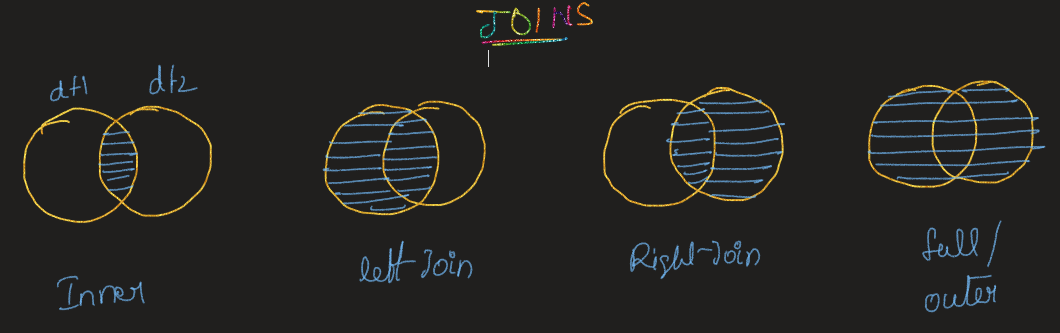

In [63]:
pd.merge(df1,df2,how="inner")

,Names,Age,Salary
0,Dileep,22,25000


In [64]:
pd.merge(df1,df2,how="inner",on="Names")

,Names,Age_x,Salary_x,Age_y,Salary_y
0,Dileep,22,25000,22,25000
1,Sreehari,21,40000,21,30000


In [65]:
pd.merge(df1,df2,how="inner",on=["Names","Age"])

,Names,Age,Salary_x,Salary_y
0,Dileep,22,25000,25000
1,Sreehari,21,40000,30000


In [66]:
# left join
pd.merge(df1,df2,how="left")

,Names,Age,Salary
0,Kishore,24,30000
1,Dileep,22,25000
2,Sreehari,21,40000
3,Upendhar,25,50000


In [67]:
# Right join
pd.merge(df1,df2,how="right")

,Names,Age,Salary
0,Anwesha,23,40000
1,Bhavani,21,35000
2,Sreehari,21,30000
3,Dileep,22,25000
4,Druvi,18,30000


In [68]:
# Full join
pd.merge(df1,df2,how="outer")

,Names,Age,Salary
0,Kishore,24,30000
1,Dileep,22,25000
2,Sreehari,21,40000
3,Upendhar,25,50000
4,Anwesha,23,40000
5,Bhavani,21,35000
6,Sreehari,21,30000
7,Druvi,18,30000


## Handling Duplicates
Another important argument for drop_duplicates() is keep, which has three possible options:   

first: (default) Drop duplicates except for the first occurrence.   
last: Drop duplicates except for the last occurrence.   
False: Drop all duplicates.   
      
The two main methods that we will use are duplicated() and drop_duplicates().  The former returns a boolean series and the latter can be used to directly delete duplicate rows from a dataframe. For duplicated() method the inputs are:   
  
- keep   
    - "first": Mark duplicates as True except for the first occurrence.   
    - "last": Mark duplicates as True except for the last occurrence.   
    - False: Mark all duplicates as True   
      
For the drop_duplicates() method the keep arguments does the following.   
  
- keep  
    - "first": Drop duplicates except for the first occurrence.  
    - "last": Drop duplicates except for the last occurrence.  
    - False: Drop all duplicates   
      
The second arguments for both is:   

- subset: Only consider certain columns for identifying duplicates. If subset is not specific,  by default all of the columns will be used.

In [70]:
dup_data = pd.read_csv("Duplicate_data.csv")
dup_data

,Unnamed: 0,Gender,Married,Loan_Status
0,0,Male,Yes,Yes
1,1,Female,No,No
2,2,Male,No,No
3,3,Female,No,No
4,4,Male,Yes,Yes


In [72]:
dup_data = dup_data.drop(['Unnamed: 0'],axis=1)

In [73]:
dup_data

,Gender,Married,Loan_Status
0,Male,Yes,Yes
1,Female,No,No
2,Male,No,No
3,Female,No,No
4,Male,Yes,Yes


### duplicated()
### drop_duplicate()

In [75]:
dup_data.duplicated()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [77]:
dup_data.duplicated(subset=['Gender'])

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [78]:
dup_data.duplicated(subset=['Gender','Married'])

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [79]:
dup_data.drop_duplicates(keep="first")

,Gender,Married,Loan_Status
0,Male,Yes,Yes
1,Female,No,No
2,Male,No,No


In [80]:
dup_data.drop_duplicates(keep="last")

,Gender,Married,Loan_Status
2,Male,No,No
3,Female,No,No
4,Male,Yes,Yes


In [83]:
dup_data.drop_duplicates(keep="first",subset=["Gender"])

,Gender,Married,Loan_Status
0,Male,Yes,Yes
1,Female,No,No


In [84]:
dup_data.drop_duplicates(keep="last",subset=["Gender"])

,Gender,Married,Loan_Status
3,Female,No,No
4,Male,Yes,Yes


In [85]:
dup_data.drop_duplicates(keep="first",subset=["Gender","Married"])

,Gender,Married,Loan_Status
0,Male,Yes,Yes
1,Female,No,No
2,Male,No,No


### Selcting sample data

In [93]:
df.sample(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,New
30,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N,Low
475,LP002494,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,1.0,Rural,Y,Medium
249,LP001702,Male,No,0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban,N,Low
151,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N,Low
143,LP002209,Female,No,0,Graduate,NaN,2764,1459.0,110.0,360.0,1.0,Urban,Y,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,LP002777,Male,Yes,0,Graduate,No,2785,2016.0,110.0,360.0,1.0,Rural,Y,Low
136,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,Y,Low
390,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y,Low
325,LP002448,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,N,Low


In [88]:
df.shape

(614, 14)

In [97]:
df.sample(100,random_state=5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,New
504,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,N,Medium
52,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,Low
406,LP002211,Male,Yes,0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban,Y,Low
561,LP002050,Male,Yes,1,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,N,Medium
424,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,LP002239,Male,No,0,Not Graduate,No,2346,1600.0,132.0,360.0,1.0,Semiurban,Y,Low
250,LP001883,Female,No,0,Graduate,NaN,3418,0.0,135.0,360.0,1.0,Rural,N,Low
326,LP001698,Male,No,0,Not Graduate,No,3975,2531.0,55.0,360.0,1.0,Rural,Y,Low
155,LP002288,Male,Yes,2,Not Graduate,No,2889,0.0,45.0,180.0,0.0,Urban,N,Low


In [99]:
a = df.sample(100,random_state=5,ignore_index=True)
a

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,New
0,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,N,Medium
1,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,Low
2,LP002211,Male,Yes,0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban,Y,Low
3,LP002050,Male,Yes,1,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,N,Medium
4,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP002239,Male,No,0,Not Graduate,No,2346,1600.0,132.0,360.0,1.0,Semiurban,Y,Low
96,LP001883,Female,No,0,Graduate,NaN,3418,0.0,135.0,360.0,1.0,Rural,N,Low
97,LP001698,Male,No,0,Not Graduate,No,3975,2531.0,55.0,360.0,1.0,Rural,Y,Low
98,LP002288,Male,Yes,2,Not Graduate,No,2889,0.0,45.0,180.0,0.0,Urban,N,Low


### Saving data into local directory

In [100]:
a.to_csv("result.csv")

In [101]:
a.to_excel("result2.xlsx")

In [103]:
a.to_csv("D:\\sample\\result.csv")